In [1]:
import renderapi
import numpy as np


In [2]:
renderargs={
        "host":"render",
        "port":80,
        "owner":"forrest",
        "project":"test",
        "client_scripts":"/var/www/render/render-ws-java-client/src/main/scripts"
    }
render = renderapi.render.connect(**renderargs)

In [11]:
stack = 'test'
tilespecfile = '/var/www/render/examples/example_1/cycle1_step1_acquire_tiles.json'
tformfile = '/var/www/render/examples/example_1/cycle1_step1_acquire_transforms.json'
renderapi.stack.create_stack(stack, render=render)
renderapi.client.import_jsonfiles(stack,[tformfile],tilespecfile, render=render)

RenderError: <html>
<head><title>502 Bad Gateway</title></head>
<body bgcolor="white">
<center><h1>502 Bad Gateway</h1></center>
<hr><center>nginx/1.10.0 (Ubuntu)</center>
</body>
</html>


In [9]:
renderapi.render.get_owners(render=render)

In [22]:
orig_tilespecs = render.run(renderapi.tilespec.get_tile_specs_from_z,orig_stack,z)
princeton_tilespecs =render.run(renderapi.tilespec.get_tile_specs_from_z,princeton_stack,z)


In [23]:
i = 0
for ts in orig_tilespecs:
    good_match = [match for match in matches if (match['pId']==ts.tileId) or (match['qId']==ts.tileId)]
    
    if len(good_match)>20:
        princeton_global_total = []
        orig_local_total = []
        for match in good_match:
            if match['pId']==ts.tileId:
                princeton_local = np.array(match['matches']['q']).T
                princeton_id = match['qId']
                orig_local = np.array(match['matches']['p']).T
            else:
                princeton_local = np.array(match['matches']['p']).T
                princeton_id = match['pId']
                orig_local = np.array(match['matches']['q']).T
            princeton_global = render.run(renderapi.coordinate.local_to_world_coordinates_array,
                                         princeton_stack,princeton_local, princeton_id,z)
            princeton_global_total.append( princeton_global)
            orig_local_total.append(orig_local)
            #print princeton_id
        princeton_global_total=np.vstack(princeton_global_total)
        orig_local_total=np.vstack(orig_local_total)
        tform = renderapi.transform.Polynomial2DTransform(src=orig_local_total,dst=princeton_global_total,order=4)
        ts.tforms=[tform]
        
# local_to_world_coordinates_array(stack, dataarray, tileId, z,
# render=None, host=None, port=None,
# owner=None, project=None,
# client_script=None,
# doClientSide=False, number_of_threads=20,
# session=requests.session(), **kwargs):

In [24]:
renderapi.stack.create_stack(out_stack,render=render)
renderapi.client.import_tilespecs(out_stack,orig_tilespecs,render=render)
renderapi.stack.set_stack_state(out_stack,'COMPLETE',render=render)

<Response [201]>

In [52]:
princeton_total=np.vstack(princeton_total).shape

In [47]:
ts.tileId

u'20160802180337758_243774_7R_SID_06_redo_2_1_10_14_1.3484.0'

In [31]:
renderapi.coordinate.local_to_world_coordinates_array?

In [8]:
import matplotlib.pyplot as plt
%matplotlib notebook


<IPython.core.display.Javascript object>


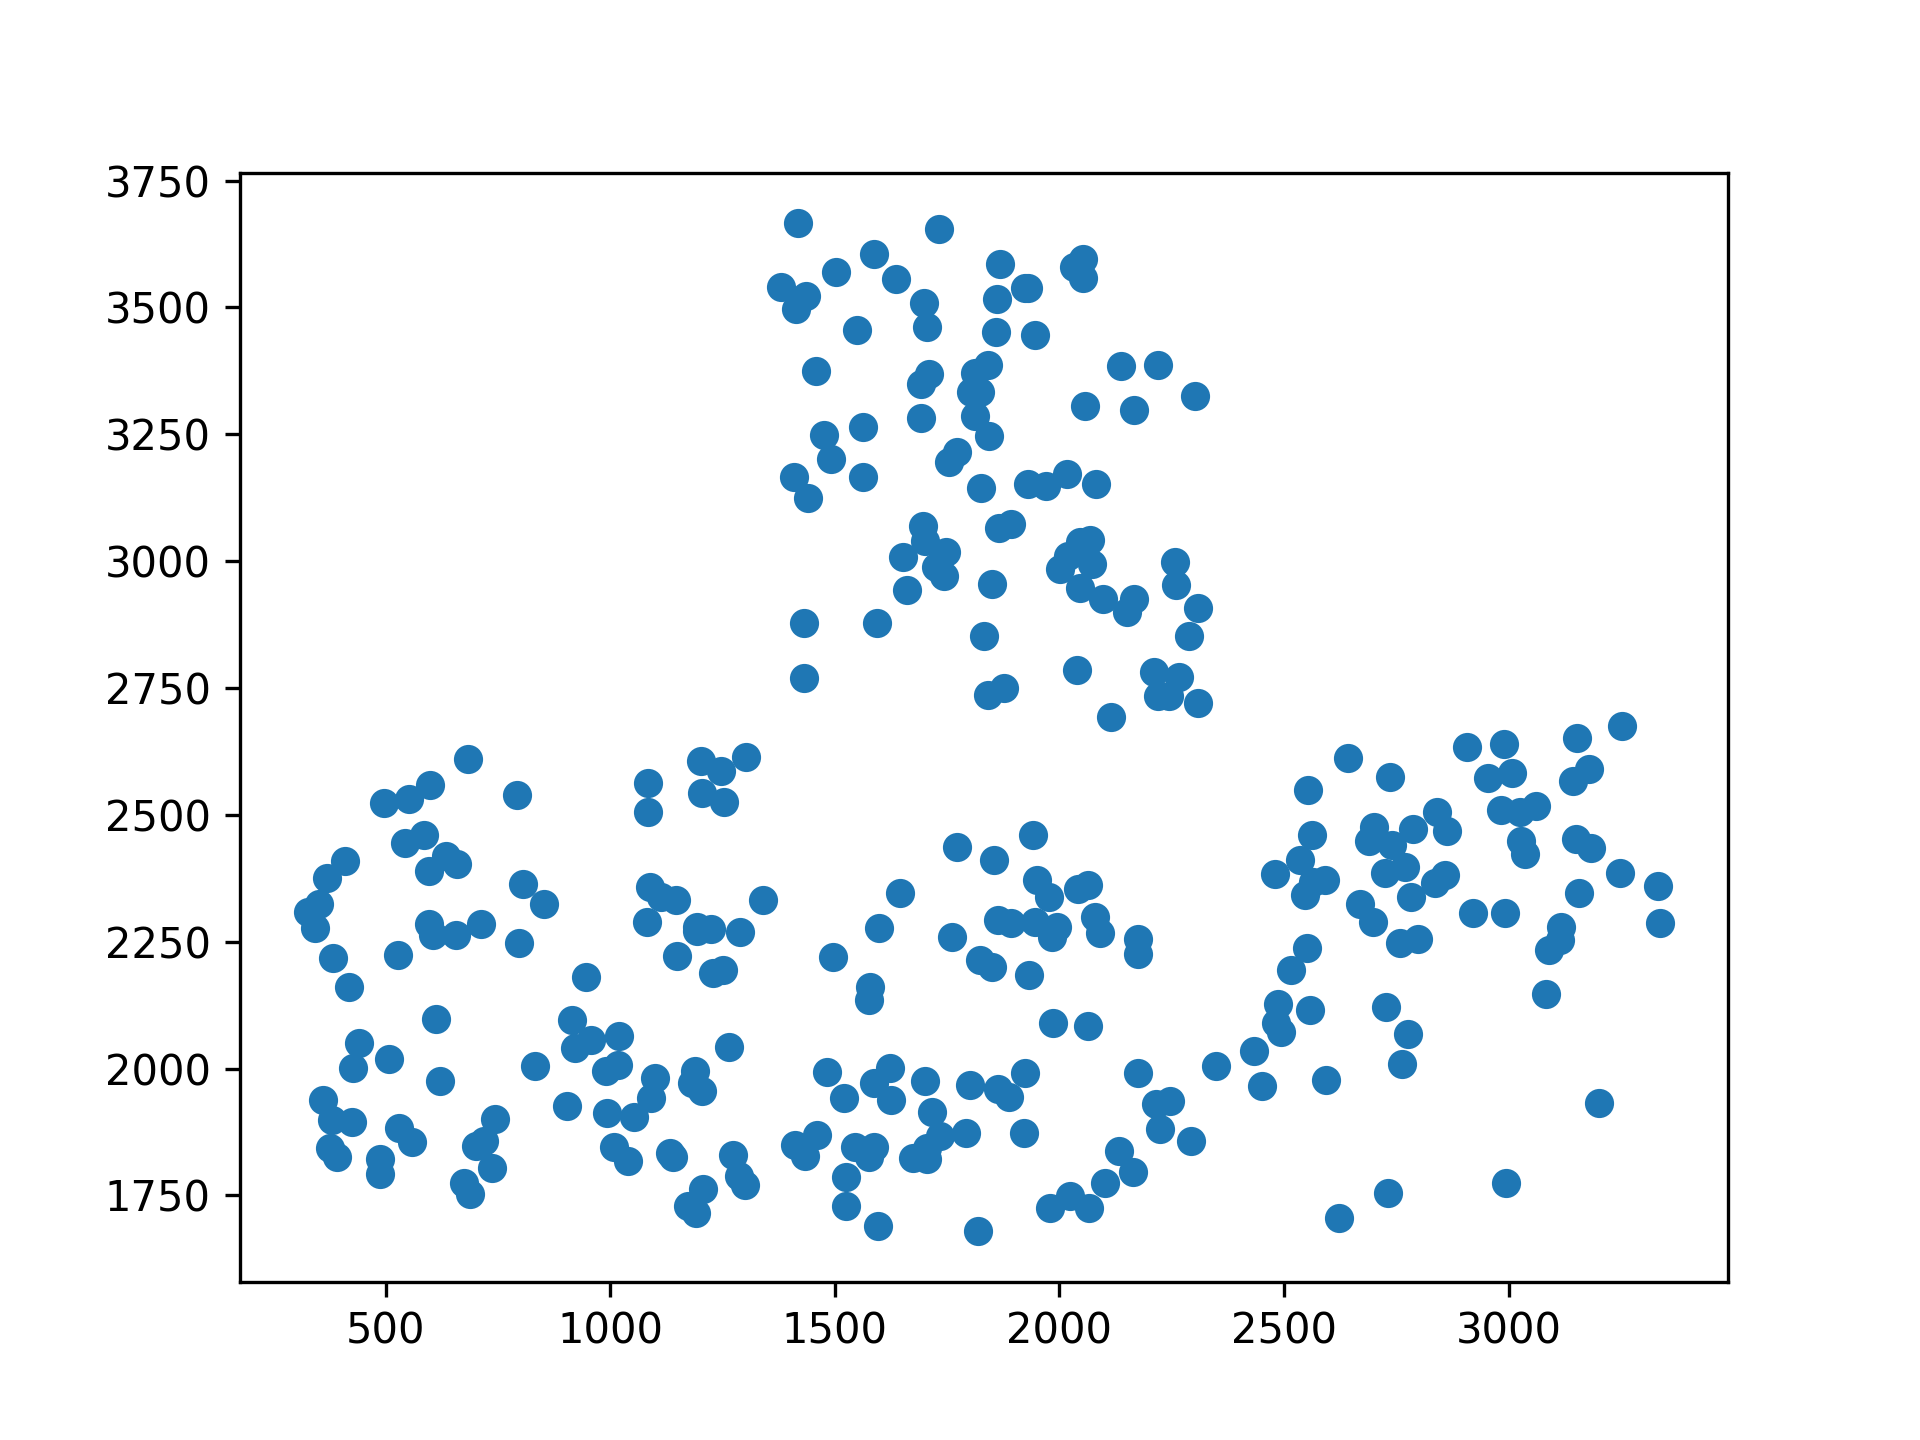

In [9]:
plt.scatter(orig_local_total[:,0],orig_local_total[:,1])

In [55]:
ts.tileId

u'20160802180337758_243774_7R_SID_06_redo_2_1_10_14_1.3484.0'